In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import jovian
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

c:\Users\Nick\AppData\Local\Programs\Python\Python313\Lib\site-packages\jovian\utils\latest.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


<IPython.core.display.Javascript object>

In [2]:
os.listdir('microsoft-data')

['GUIDE_Test.csv', 'GUIDE_Train.csv']

In [3]:
raw_df_train = pd.read_csv('microsoft-data/GUIDE_train.csv')
raw_df_test = pd.read_csv('microsoft-data/GUIDE_test.csv')

C:\Users\Nick\AppData\Local\Temp\ipykernel_24544\403980436.py:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df_test = pd.read_csv('microsoft-data/GUIDE_test.csv')


In [4]:
raw_df_train

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,NaN,NaN,Ip,Related,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,22406,23032,22795,24887,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,NaN,NaN,Url,Related,98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Url,Related,98799,138268,360606,13,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,449,592,440,479,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,2024-06-08T15:26:08.000Z,7,6,InitialAccess,NaN,TruePositive,NaN,NaN,CloudLogonRequest,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516833,1228360650033,59,196410,748366,2024-06-06T09:40:08.000Z,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Url,Related,98799,138268,360606,164,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
9516834,867583395122,44,14117,7425,2024-06-11T22:51:03.000Z,78,57,Exfiltration,NaN,BenignPositive,NaN,NaN,MailMessage,Impacted,98799,138268,360606,160396,441377,270,425863,453297,153085,22919,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516835,395136991850,43,644,8973,2024-05-20T23:01:01.000Z,52,10,Impact,NaN,BenignPositive,NaN,NaN,Ip,Related,98799,138268,465,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [5]:
raw_df_test

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,NaN,NaN,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,14,22,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,NaN,NaN,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,541165881145,262,3017,227156,2024-06-04T03:53:15.000Z,139,120,InitialAccess,T1566.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,13354,13012,13489,14567,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147988,438086666953,1323,31001,304819,2024-06-04T19:32:19.000Z,219,196,InitialAccess,NaN,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,95744,172717,96809,107151,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private
4147989,1297080124487,47,3653,7243,2024-06-15T00:50:22.000Z,57,29,CommandAndControl,T1046;T1071;T1210,FalsePositive,NaN,NaN,Ip,Related,98799,138268,1084,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147990,627065226886,70,4243,19142,2024-06-11T16:18:12.000Z,1,1,InitialAccess,T1566.002,BenignPositive,NaN,NaN,Mailbox,Impacted,98799,138268,360606,160396,53146,59351,53421,25428,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private


In [6]:
raw_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [10]:
raw_df_train.columns.tolist()

['Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'Timestamp',
 'DetectorId',
 'AlertTitle',
 'Category',
 'MitreTechniques',
 'IncidentGrade',
 'ActionGrouped',
 'ActionGranular',
 'EntityType',
 'EvidenceRole',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'EmailClusterId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'ThreatFamily',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'ResourceType',
 'Roles',
 'OSFamily',
 'OSVersion',
 'AntispamDirection',
 'SuspicionLevel',
 'LastVerdict',
 'CountryCode',
 'State',
 'City']

In [7]:
raw_df_train.dropna(subset=['IncidentGrade'], inplace=True)

In [8]:
raw_df_test.dropna(subset=['IncidentGrade'], inplace=True)

In [9]:
unique_counts = raw_df_train.nunique().sort_values(ascending=False)

# Print the number of unique values for each column
print(unique_counts)

AlertId               1248789
Timestamp              755654
Id                     707108
AccountUpn             524760
IncidentId             448901
NetworkMessageId       375196
AccountName            363254
AccountSid             353113
AccountObjectId        338252
IpAddress              285957
FileName               222085
Url                    123252
DeviceName             114267
Sha256                 106416
FolderPath              87832
AlertTitle              79952
DeviceId                75557
EmailClusterId          26474
City                     9342
DetectorId               7813
OrgId                    5340
ApplicationName          2681
ResourceIdName           2283
ThreatFamily             1745
ApplicationId            1728
State                    1368
RegistryKey              1341
MitreTechniques          1162
OAuthApplicationId        703
RegistryValueData         699
RegistryValueName         525
CountryCode               236
OSVersion                  58
EntityType

<Axes: title={'center': 'No. of unique values in each column'}>

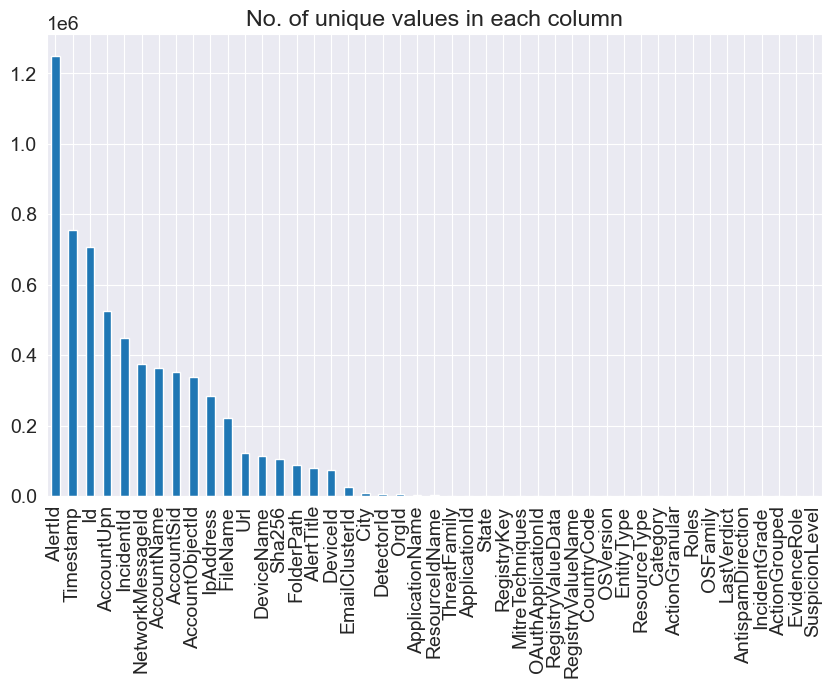

In [10]:
plt.title("No. of unique values in each column")
unique_counts.plot(kind='bar')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_df, val_df = train_test_split(raw_df_train, test_size=0.3, random_state=42)


In [13]:
test_df = raw_df_test

In [14]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('raw_df_test.shape :', raw_df_test.shape)

train_df.shape : (6625847, 45)
val_df.shape : (2839650, 45)
raw_df_test.shape : (4147992, 46)


In [15]:
# Test csv has one extra column

missing_in_test = set(train_df.columns) - set(test_df.columns)
missing_in_train = set(test_df.columns) - set(train_df.columns)
print("Missing columns in train:", missing_in_train)

Missing columns in train: {'Usage'}


In [16]:
test_df['Usage']

0          Private
1           Public
2           Public
3           Public
4           Public
            ...   
4147987     Public
4147988    Private
4147989     Public
4147990    Private
4147991     Public
Name: Usage, Length: 4147992, dtype: object

In [17]:
null_values_list =  train_df.isna().sum().sort_values(ascending=False)
null_values_list

ActionGranular        6622577
ActionGrouped         6622577
ResourceType          6620943
ThreatFamily          6573382
EmailClusterId        6558204
AntispamDirection     6501709
Roles                 6472950
SuspicionLevel        5619937
LastVerdict           5067458
MitreTechniques       3799290
Timestamp                   0
OrgId                       0
Id                          0
EntityType                  0
IncidentGrade               0
AlertTitle                  0
Category                    0
DetectorId                  0
IncidentId                  0
AlertId                     0
EvidenceRole                0
AccountObjectId             0
AccountName                 0
Sha256                      0
DeviceId                    0
Url                         0
AccountSid                  0
AccountUpn                  0
IpAddress                   0
ApplicationId               0
RegistryValueData           0
RegistryValueName           0
RegistryKey                 0
NetworkMes

In [18]:
val_df.isna().sum().sort_values(ascending=False)


ActionGranular        2838196
ActionGrouped         2838196
ResourceType          2837539
ThreatFamily          2817234
EmailClusterId        2810481
AntispamDirection     2786486
Roles                 2774692
SuspicionLevel        2408090
LastVerdict           2171212
MitreTechniques       1628223
Timestamp                   0
OrgId                       0
Id                          0
EntityType                  0
IncidentGrade               0
AlertTitle                  0
Category                    0
DetectorId                  0
IncidentId                  0
AlertId                     0
EvidenceRole                0
AccountObjectId             0
AccountName                 0
Sha256                      0
DeviceId                    0
Url                         0
AccountSid                  0
AccountUpn                  0
IpAddress                   0
ApplicationId               0
RegistryValueData           0
RegistryValueName           0
RegistryKey                 0
NetworkMes

In [19]:
test_df.isna().sum().sort_values(ascending=False)

ActionGrouped         4146079
ActionGranular        4146079
ResourceType          4144998
ThreatFamily          4116614
EmailClusterId        4106285
AntispamDirection     4071481
Roles                 4039317
SuspicionLevel        3498157
LastVerdict           3155260
MitreTechniques       2307104
DetectorId                  0
IncidentId                  0
Id                          0
OrgId                       0
EvidenceRole                0
EntityType                  0
Category                    0
IncidentGrade               0
AlertTitle                  0
AlertId                     0
Timestamp                   0
DeviceId                    0
AccountName                 0
DeviceName                  0
IpAddress                   0
Sha256                      0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
Url                         0
ApplicationName             0
ApplicationId               0
RegistryValueData           0
RegistryVa

In [20]:
# Dropping all columns with null values as they are significant in number and common across all splits

columns_to_drop = null_values_list[null_values_list > 0].index
train_df = train_df.drop(columns=columns_to_drop)
val_df = val_df.drop(columns=columns_to_drop)
test_df = test_df.drop(columns=columns_to_drop)

In [21]:
# Dropping datapoints that don't have target variable
train_df = train_df.dropna(subset=['IncidentGrade'])
val_df = val_df.dropna(subset=['IncidentGrade'])
test_df = test_df.dropna(subset=['IncidentGrade'])

In [22]:
# Processing DateTime

train_df['Timestamp'] = pd.to_datetime(train_df['Timestamp'])

train_df['Year'] = train_df['Timestamp'].dt.year
train_df['Month'] = train_df['Timestamp'].dt.month
train_df['Day'] = train_df['Timestamp'].dt.day
train_df['Hour'] = train_df['Timestamp'].dt.hour
train_df['Minute'] = train_df['Timestamp'].dt.minute
train_df['Second'] = train_df['Timestamp'].dt.second
train_df['Weekday'] = train_df['Timestamp'].dt.weekday  # 0 = Monday, 6 = Sunday

val_df['Timestamp'] = pd.to_datetime(val_df['Timestamp'])

val_df['Year'] = val_df['Timestamp'].dt.year
val_df['Month'] = val_df['Timestamp'].dt.month
val_df['Day'] = val_df['Timestamp'].dt.day
val_df['Hour'] = val_df['Timestamp'].dt.hour
val_df['Minute'] = val_df['Timestamp'].dt.minute
val_df['Second'] = val_df['Timestamp'].dt.second
val_df['Weekday'] = val_df['Timestamp'].dt.weekday  

test_df['Timestamp'] = pd.to_datetime(test_df['Timestamp'])

test_df['Year'] = test_df['Timestamp'].dt.year
test_df['Month'] = test_df['Timestamp'].dt.month
test_df['Day'] = test_df['Timestamp'].dt.day
test_df['Hour'] = test_df['Timestamp'].dt.hour
test_df['Minute'] = test_df['Timestamp'].dt.minute
test_df['Second'] = test_df['Timestamp'].dt.second
test_df['Weekday'] = test_df['Timestamp'].dt.weekday 

In [23]:
print("Unique values for Year:", len(train_df['Year'].unique()))

#Thus we cant delete year as there's more than 1 

Unique values for Year: 2


In [24]:
train_df.select_dtypes([int]).columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second',
       'Weekday'],
      dtype='object')

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
#label_encoding

to_label_encode = train_df.select_dtypes([object]).columns

print(to_label_encode)

label_encoders = {}

for col in to_label_encode:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])  
    label_encoders[col] = le 

for col in to_label_encode:
    if col in val_df: 
        val_df[col] = label_encoders[col].transform(val_df[col]) 

for col in to_label_encode:
    if col in test_df: 
        test_df[col] = label_encoders[col].transform(test_df[col]) 



Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole'], dtype='object')


In [27]:
#Sha256 is same as filename, so no  need to keep it, timestamp has been processed
train_df = train_df.drop(['Timestamp'], axis=1)
val_df = val_df.drop(['Timestamp'], axis=1)
test_df = test_df.drop(['Timestamp'], axis=1)

In [28]:
correlation_matrix = train_df.corr()

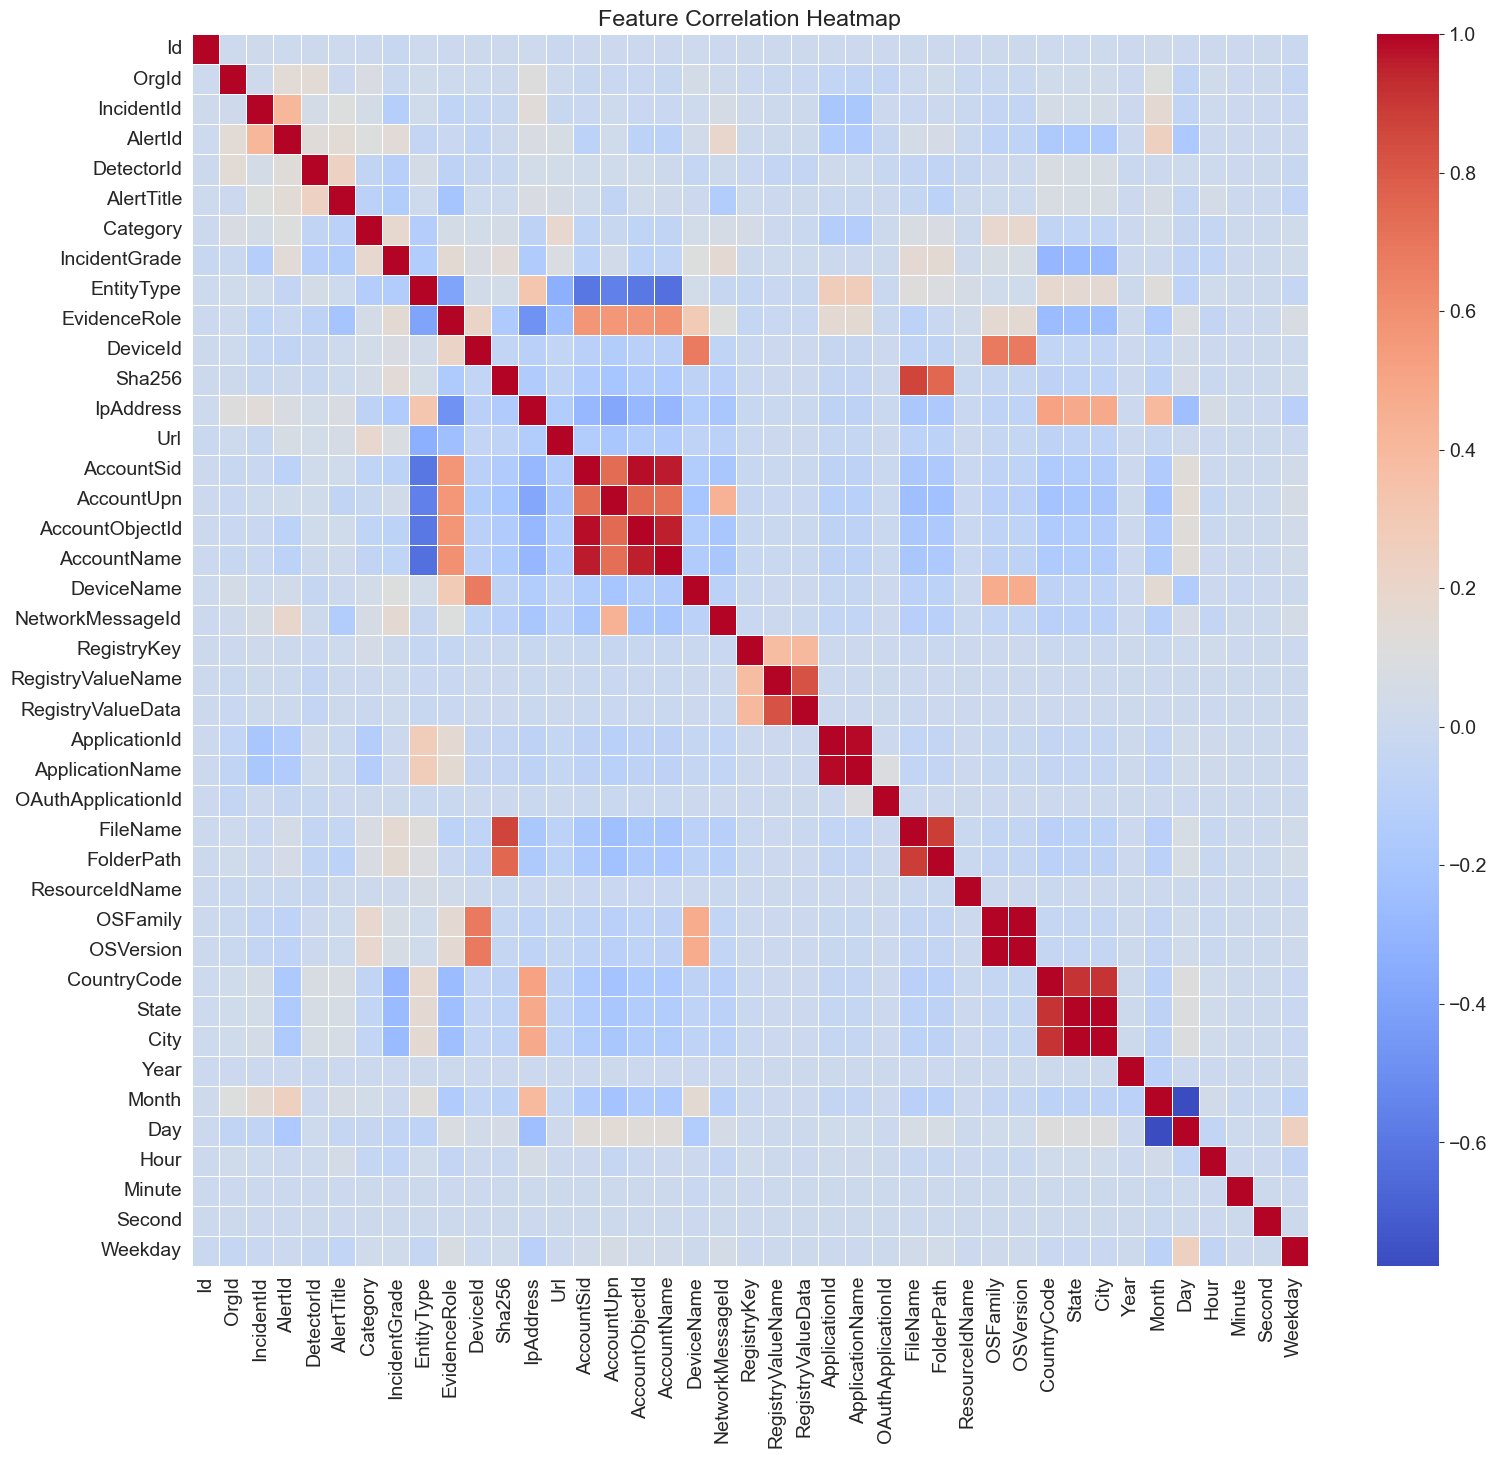

In [29]:
# Visualize correlation heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [30]:
X_train = train_df.drop(columns=['IncidentGrade'])
y_train = train_df['IncidentGrade']

X_val = val_df.drop(columns=['IncidentGrade'])
y_val = val_df['IncidentGrade']

X_test = test_df.drop(columns=['IncidentGrade','Usage'])
y_test = test_df['IncidentGrade']

-----------------------------------------------------------------------------------------------------------------------------------------------




------------SELF METHOD



-----------------------------------------------------------------------------------------------------------------------------------------------

In [31]:
X_train


,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day,Hour,Minute,Second,Weekday
2806737,1228360651909,96,3773,2393,27,18,5,19,1,98799,138268,360606,160396,441377,673934,425863,453297,43403,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,15,20,17,13,5
7602186,1649267442275,146,400,66225,1,1,10,31,1,98799,138268,360606,71800,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,3,6,27,50,0
8229493,523986010577,54,527074,1448447,156,86803,7,32,0,98799,138268,360606,160396,286092,360641,220766,233482,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,3,15,48,47,0
4254434,1434519077916,47,9085,7130,71,4139,9,15,1,98799,138268,3468,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,5,23,6,49,53,3
7421778,575525619348,21,798,191935,3,4,16,31,1,98799,138268,360606,4875,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,4,11,54,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243304,420906797051,23,171,73887,4,3,10,15,1,98799,138268,377,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,1,0,0,2024,6,4,2,17,30,1
2246579,1400159338513,6,2211,1429,17,434,9,15,1,98799,138268,4558,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,5,21,16,20,43,1
4327917,1675037248896,2,16309,13859,15,13,7,21,0,98799,138268,360606,160396,441377,8,425863,453297,153085,32497,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,6,12,35,50,3
6586107,1666447314598,72,341,501717,0,0,10,6,1,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,4,19,33,50,1


In [32]:
train_df

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day,Hour,Minute,Second,Weekday
2806737,1228360651909,96,3773,2393,27,18,5,0,19,1,98799,138268,360606,160396,441377,673934,425863,453297,43403,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,15,20,17,13,5
7602186,1649267442275,146,400,66225,1,1,10,1,31,1,98799,138268,360606,71800,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,3,6,27,50,0
8229493,523986010577,54,527074,1448447,156,86803,7,0,32,0,98799,138268,360606,160396,286092,360641,220766,233482,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,3,15,48,47,0
4254434,1434519077916,47,9085,7130,71,4139,9,1,15,1,98799,138268,3468,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,5,23,6,49,53,3
7421778,575525619348,21,798,191935,3,4,16,0,31,1,98799,138268,360606,4875,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,4,11,54,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243304,420906797051,23,171,73887,4,3,10,2,15,1,98799,138268,377,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,1,0,0,2024,6,4,2,17,30,1
2246579,1400159338513,6,2211,1429,17,434,9,0,15,1,98799,138268,4558,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,5,21,16,20,43,1
4327917,1675037248896,2,16309,13859,15,13,7,0,21,0,98799,138268,360606,160396,441377,8,425863,453297,153085,32497,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,6,12,35,50,3
6586107,1666447314598,72,341,501717,0,0,10,2,6,1,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,4,19,33,50,1


In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model = DecisionTreeClassifier(random_state=42)

In [35]:
%%time
model.fit(X_train, y_train)

CPU times: total: 2min 28s
Wall time: 2min 31s


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [37]:
pred_train = model.predict(X_train)

In [38]:
accuracy_score(pred_train, y_train)

1.0

In [39]:
proba_train = model.predict_proba(X_train)

In [40]:
proba_train

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], shape=(6625847, 3))

In [41]:
model.score(X_val, y_val)

0.9957653231912383

99.58% accuracy achieved on validation split

In [42]:
model.score(X_test, y_test)

0.9092025731968625

90.9319% accuracy achieved on test split

In [43]:
from sklearn.tree import plot_tree, export_text

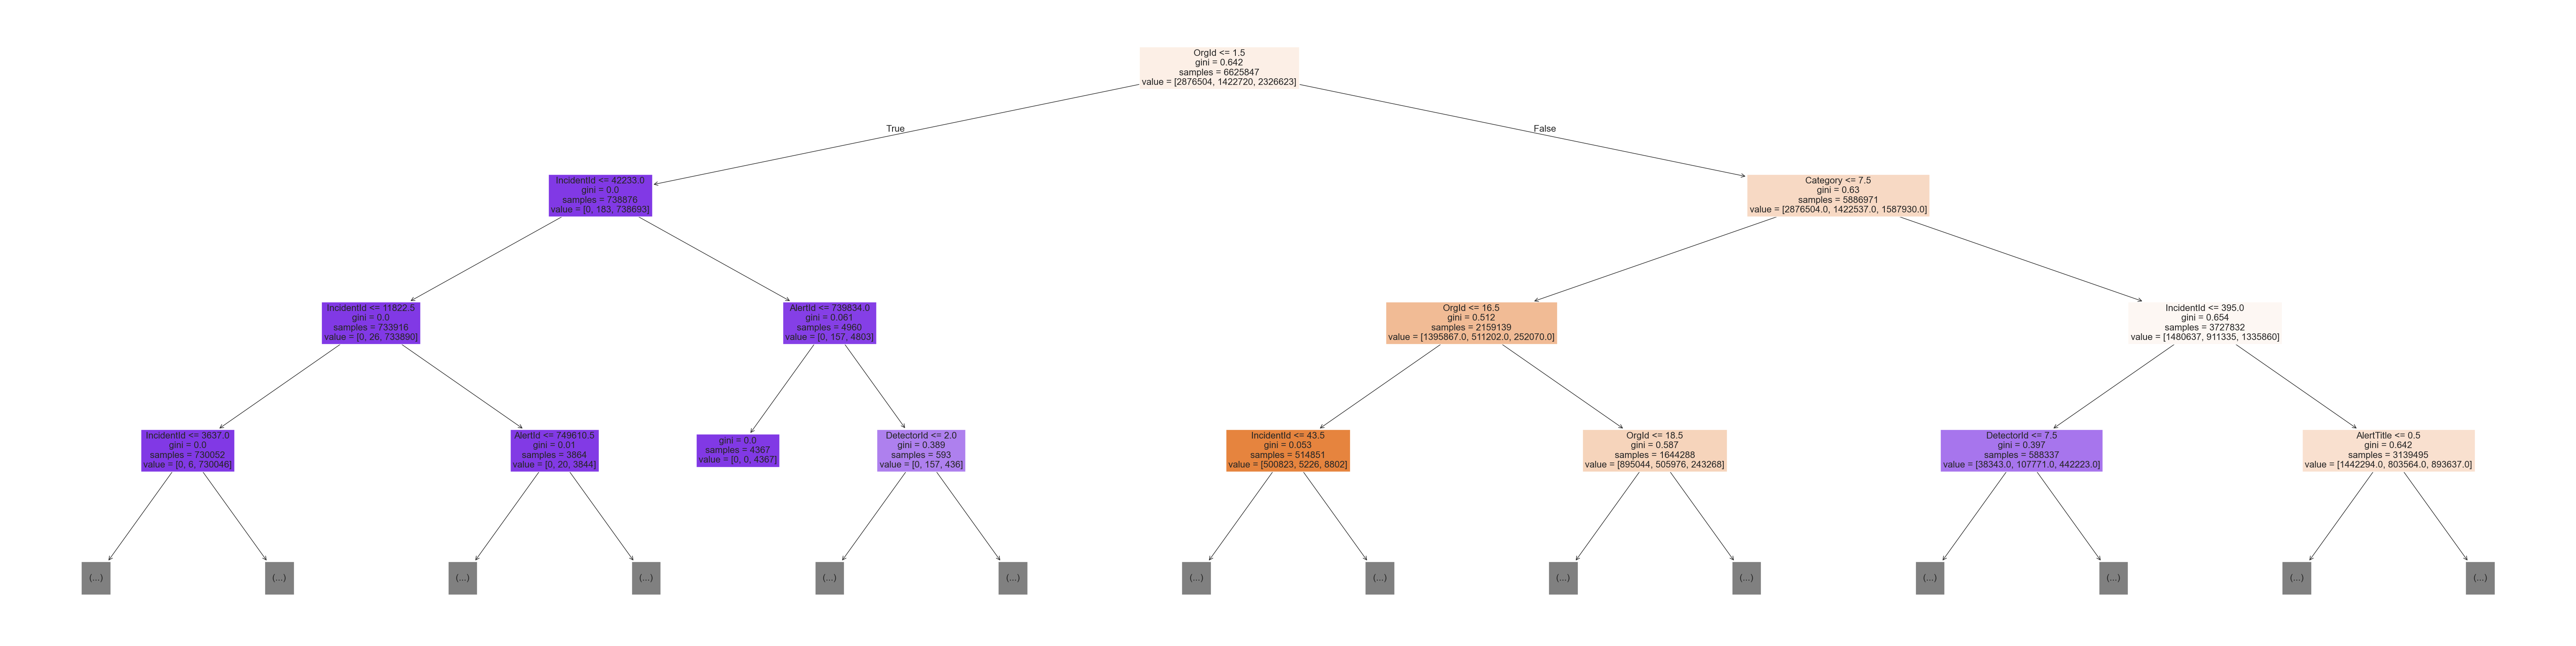

In [44]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=3, filled=True);

In [45]:
model.tree_.max_depth

64

In [46]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- OrgId <= 1.50
|   |--- IncidentId <= 42233.00
|   |   |--- IncidentId <= 11822.50
|   |   |   |--- IncidentId <= 3637.00
|   |   |   |   |--- class: 2
|   |   |   |--- IncidentId >  3637.00
|   |   |   |   |--- IncidentId <= 3709.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- IncidentId >  3709.50
|   |   |   |   |   |--- AlertId <= 799540.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- AlertId >  799540.50
|   |   |   |   |   |   |--- DetectorId <= 3.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- DetectorId >  3.50
|   |   |   |   |   |   |   |--- class: 2
|   |   |--- IncidentId >  11822.50
|   |   |   |--- AlertId <= 749610.50
|   |   |   |   |--- class: 2
|   |   |   |--- AlertId >  749610.50
|   |   |   |   |--- AlertId <= 1021907.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- AlertId >  1021907.50
|   |   |   |   |   |--- class: 2
|   |--- IncidentId >  42233.00
|   |   |--- AlertId <= 739834.00
|   |   |   |

In [47]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [48]:
importance_df

,feature,importance
1,OrgId,0.477929
2,IncidentId,0.094853
4,DetectorId,0.091557
3,AlertId,0.085915
5,AlertTitle,0.083981
6,Category,0.063849
35,Day,0.023724
0,Id,0.016971
36,Hour,0.009324
39,Weekday,0.007690


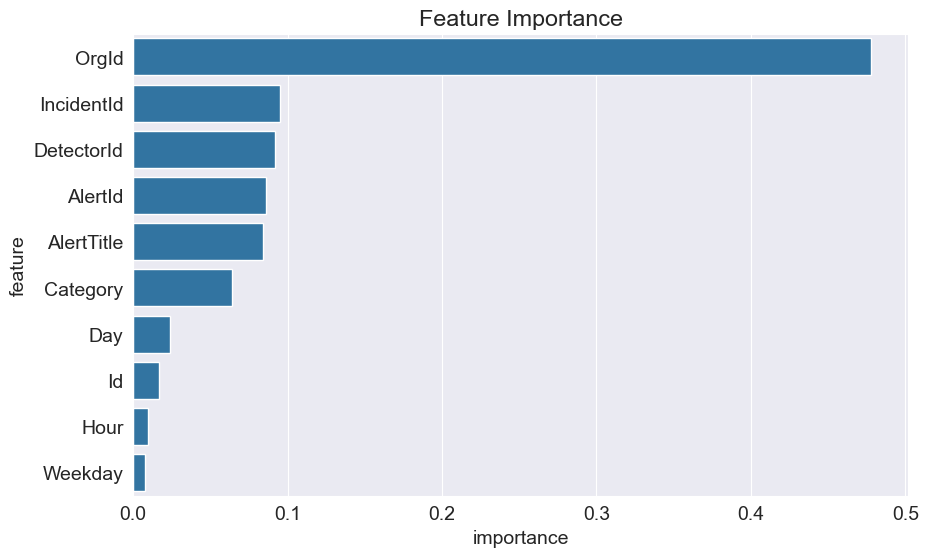

In [49]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [50]:
model = DecisionTreeClassifier(max_depth=128, random_state=42)

In [51]:
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,128
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [52]:
model.score(X_train, y_train)

1.0

max_depth = 32: 98.84% accuracy on training split 
max_depth = 128: 100%

In [53]:
model.score(X_val, y_val)

0.9957653231912383

max_depth = 32: 98.49% accuracy on validation split
max_depth = 128: 99.58% accuracy on validation split

In [54]:
model.score(X_test, y_test)

0.9092025731968625

max_depth = 32: 90.78% accuracy on test set
max_depth = 128: 90.931% accuracy on test set

In [55]:
model.tree_.max_depth

64

max_depth = 128 produces same model as when max_depth is unspecified.

I.E. Both cases build tree only upto depth 64

Varying max_leaf_nodes:

In [56]:
# Leaf nodes in previous, unspecified depth tree - 56K
model = DecisionTreeClassifier(max_leaf_nodes=131072, random_state=42)


In [57]:
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,131072
,min_impurity_decrease,0.0
,class_weight,None


In [58]:
model.score(X_train, y_train)

1.0

In [59]:
model.score(X_val, y_val)

0.9957836353071682

In [60]:
model.score(X_test, y_test)

0.9117898491607506

------

max_leaf_nodes = 128:
    training accuracy = 100%
    validation accuracy = 99.58%
    testing accuracy = 91.174%



    When SHA included, testing accuracy slightly increasses to 91.178%
    Validation accuracy drops slightly to 99.57%
    Training accuracy remains at 100%

In [61]:
model.tree_.n_leaves
model.tree_.max_depth

64

Max depth and number of leaf nodes remains unchanged (64, 56172) even after setting max_leaf_nodes to 131072

Model accuracy increased by 0.2% however

In [62]:
pred_test = model.predict(X_test)

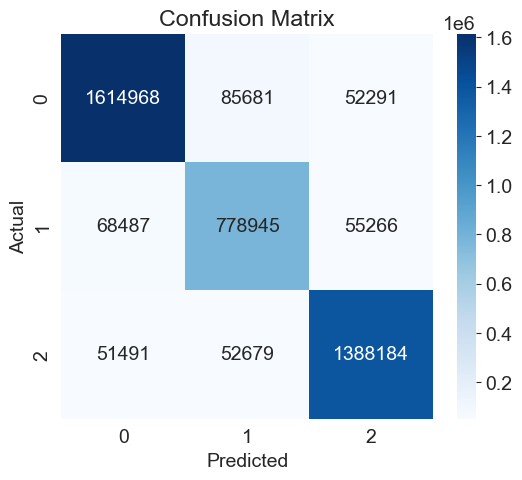

In [63]:
cm = confusion_matrix(y_test, pred_test)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix")
plt.show()

In [64]:
from sklearn.metrics import classification_report


In [65]:
print(classification_report(y_test, pred_test))


              precision    recall  f1-score   support

           0       0.93      0.92      0.93   1752940
           1       0.85      0.86      0.86    902698
           2       0.93      0.93      0.93   1492354

    accuracy                           0.91   4147992
   macro avg       0.90      0.90      0.90   4147992
weighted avg       0.91      0.91      0.91   4147992



-------------

Decision Trees

-------------

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=100)

In [74]:
%%time
model_rf.fit(X_train, y_train)

CPU times: total: 1h 10min 45s
Wall time: 5min 16s


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [75]:
model.score(X_train, y_train)

1.0

In [76]:
model.score(X_val, y_val)

0.9957836353071682

In [77]:
model.score(X_test, y_test)

0.9117898491607506

In [79]:
importance_df

,feature,importance
1,OrgId,0.477929
2,IncidentId,0.094853
4,DetectorId,0.091557
3,AlertId,0.085915
5,AlertTitle,0.083981
6,Category,0.063849
35,Day,0.023724
0,Id,0.016971
36,Hour,0.009324
39,Weekday,0.007690


In [81]:
model_rf.estimators_[0]

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,1608637542
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
model_rf

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False
